___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

#  Project : Biased Raings Detection 
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---



---
----




**article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [43]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000



Graph between populartiy of a film(no of votes it gets) and it's ratings .

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

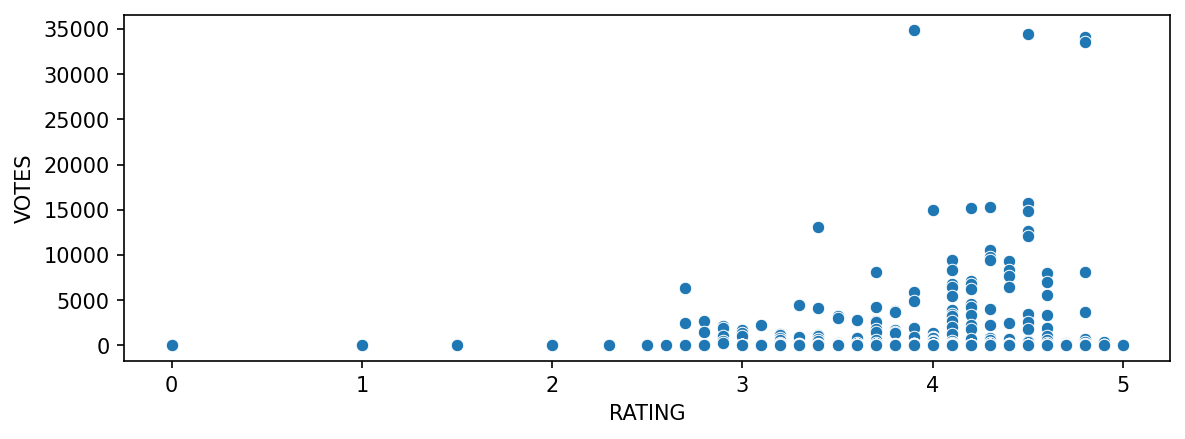

In [4]:
# CODE HERE
plt.figure(figsize=(9,3) , dpi = 150)
sns.scatterplot(data = fandango , x = "RATING" , y = "VOTES")


correlation between the columns

In [7]:
# CODE HERE
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000



Creating a new column "Year" by stripping the year from the title of the film

In [5]:
# CODE HERE
title = "Film Title Name (Year)"
fandango["YEAR"] = fandango["FILM"].apply(lambda title : title.split("(")[-1].strip(")"))
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


no of movies in the fandango dataframe per year

In [9]:
#CODE HERE
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

10 movies with the highest no of votes

In [7]:

fandango.sort_values(by="VOTES" , axis=0 , ascending= False).head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055



no of movies having 0 votes 

In [8]:
len(fandango [fandango["VOTES"] == 0])

69


Removing the movies from the dataframe which have 0 votes

In [9]:

fandango = fandango[fandango["VOTES"] != 0] 
fandango 

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1
431,The Intern (2015),5.0,5.0,1
432,The Park Bench (2015),5.0,5.0,1
433,The Wanted 18 (2015),5.0,5.0,1


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

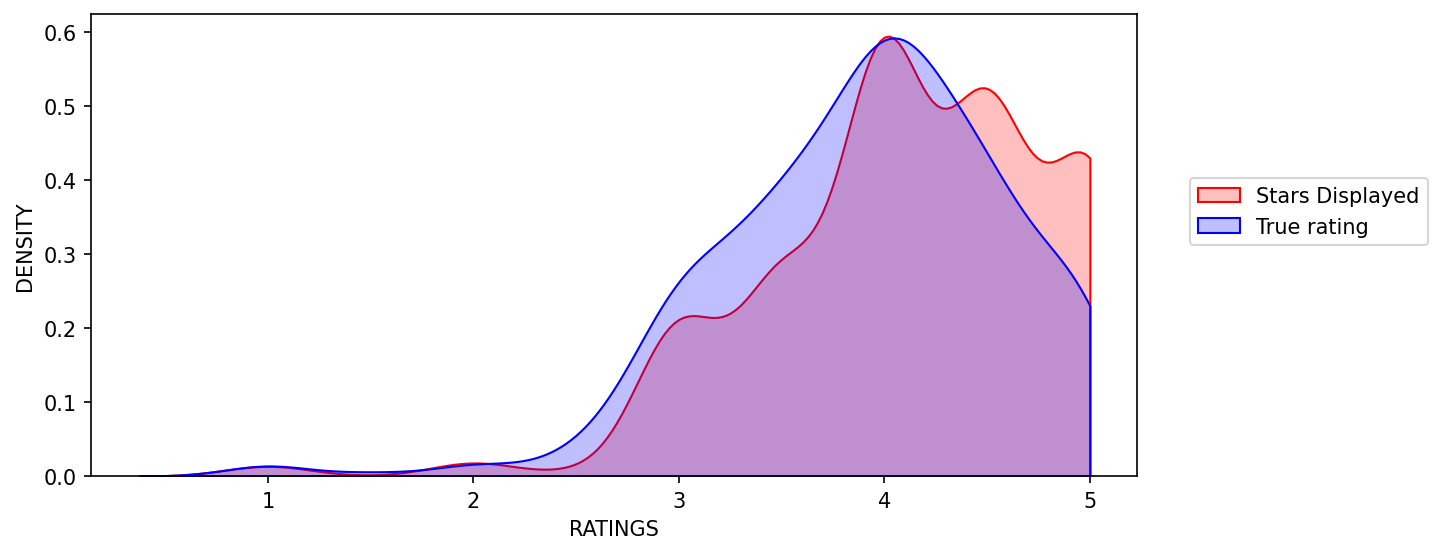

In [10]:

plt.figure(figsize=(9,4) , dpi = 150 )
sns.kdeplot(data = fandango , x = "STARS" , fill= True , color = "red", clip = [0,5] , label = "Stars Displayed" )
sns.kdeplot(data = fandango , x = "RATING" , fill = True , color = "blue" , clip = [0,5] , label = "True rating")
# Adding axis labels 
plt.xlabel("RATINGS")
plt.ylabel("DENSITY")
# Show Legend
plt.legend(loc=(1.05 , 0.5))



Creating a new column which measures the the difference between stars(rating shown to user) and ratings(the original rating )

In [11]:

fandango["STARS_DIFF"] = (fandango["STARS"] - fandango["RATING"]).round(2)
fandango

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,0.0
431,The Intern (2015),5.0,5.0,1,0.0
432,The Park Bench (2015),5.0,5.0,1,0.0
433,The Wanted 18 (2015),5.0,5.0,1,0.0


 Creating a count plot to display the number of times a certain difference occurs

C:\Users\gaurav\AppData\Local\Temp\ipykernel_2448\1099059067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = fandango , x = "STARS_DIFF" , palette="plasma")


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

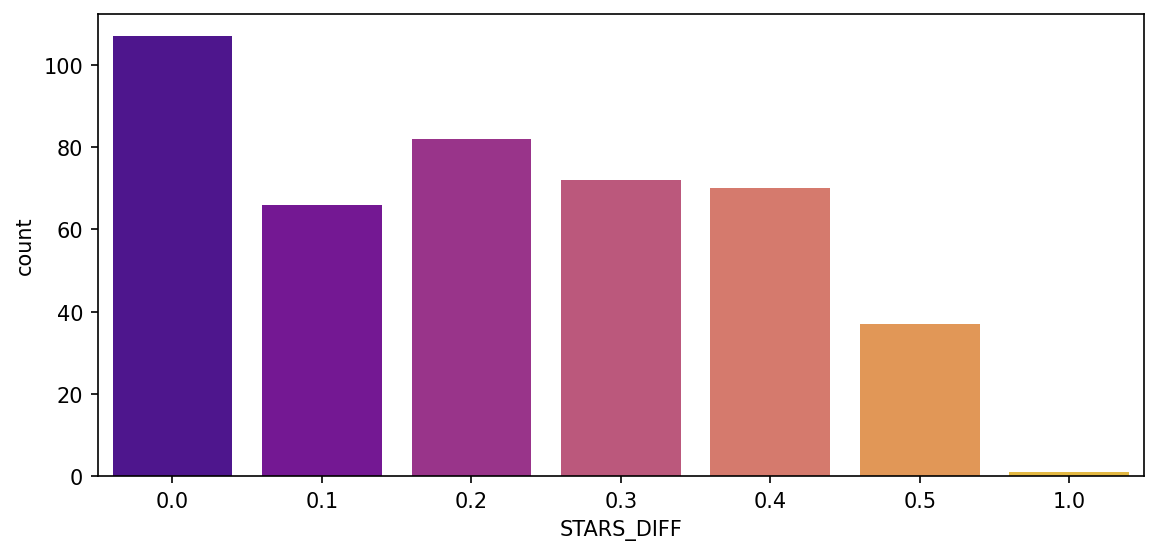

In [12]:

plt.figure(figsize=(9,4) , dpi = 150 )
sns.countplot(data = fandango , x = "STARS_DIFF" , palette="plasma")

movie having one star difference

In [13]:

fandango[fandango["STARS_DIFF"] == 1 ]

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


Comparison of Fandango Ratings to Other Sites

In [16]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [17]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [18]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [19]:
all_sites.corr()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.111325,0.107083
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.198320,0.221776
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.138184,0.114507
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.121478,0.112580
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.205573,0.230058
Metacritic_user_vote_count,0.111325,0.198320,0.138184,0.121478,0.205573,1.000000,0.880635
IMDB_user_vote_count,0.107083,0.221776,0.114507,0.112580,0.230058,0.880635,1.000000


### Rotten Tomatoes

 RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

exploring the relationship between RT Critic review and RT User reviews.

(0.0, 100.0)

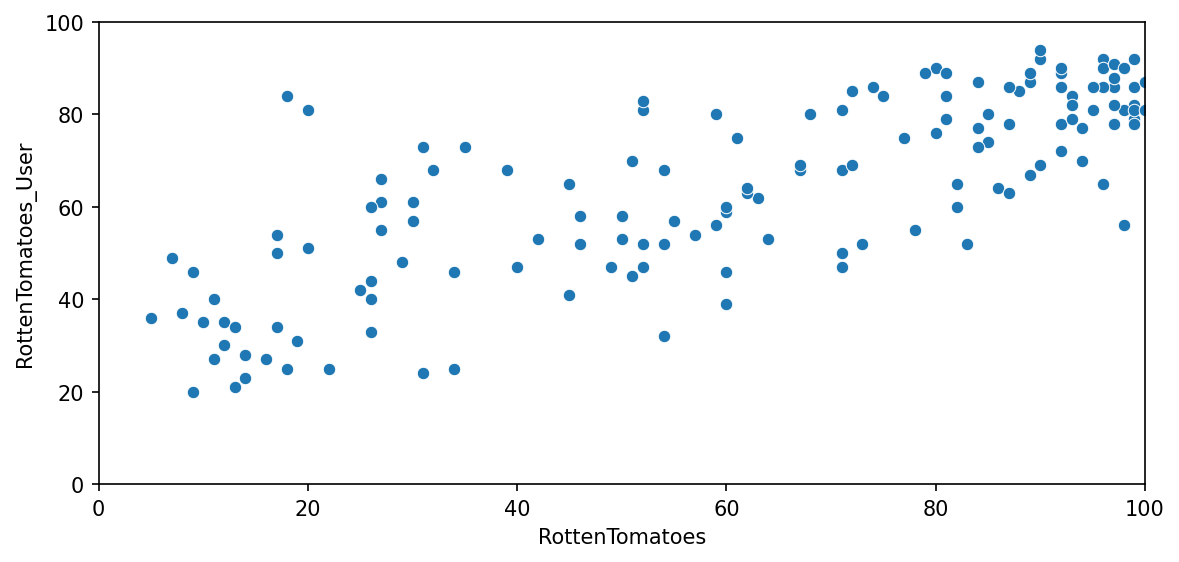

In [20]:

plt.figure(figsize=(9,4) , dpi = 150)
sns.scatterplot(data=all_sites , x = "RottenTomatoes" , y = "RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [22]:
#CODE HERE
all_sites["RottenTomatoes_Diff"] = (all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"] ).round(2)
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculating the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [23]:

def make_positive(num) : 
    if num < 0 :
        num = num*-1 
    if num > 0 :
        num = num * 1 
    return num 

all_sites["RottenTomatoes_Diff"].apply(lambda num : make_positive(num)).mean()

15.095890410958905


Plotting the distribution of the difference between RT Critics Score and RT User Score .

<AxesSubplot:xlabel='RottenTomatoes_Diff', ylabel='Count'>

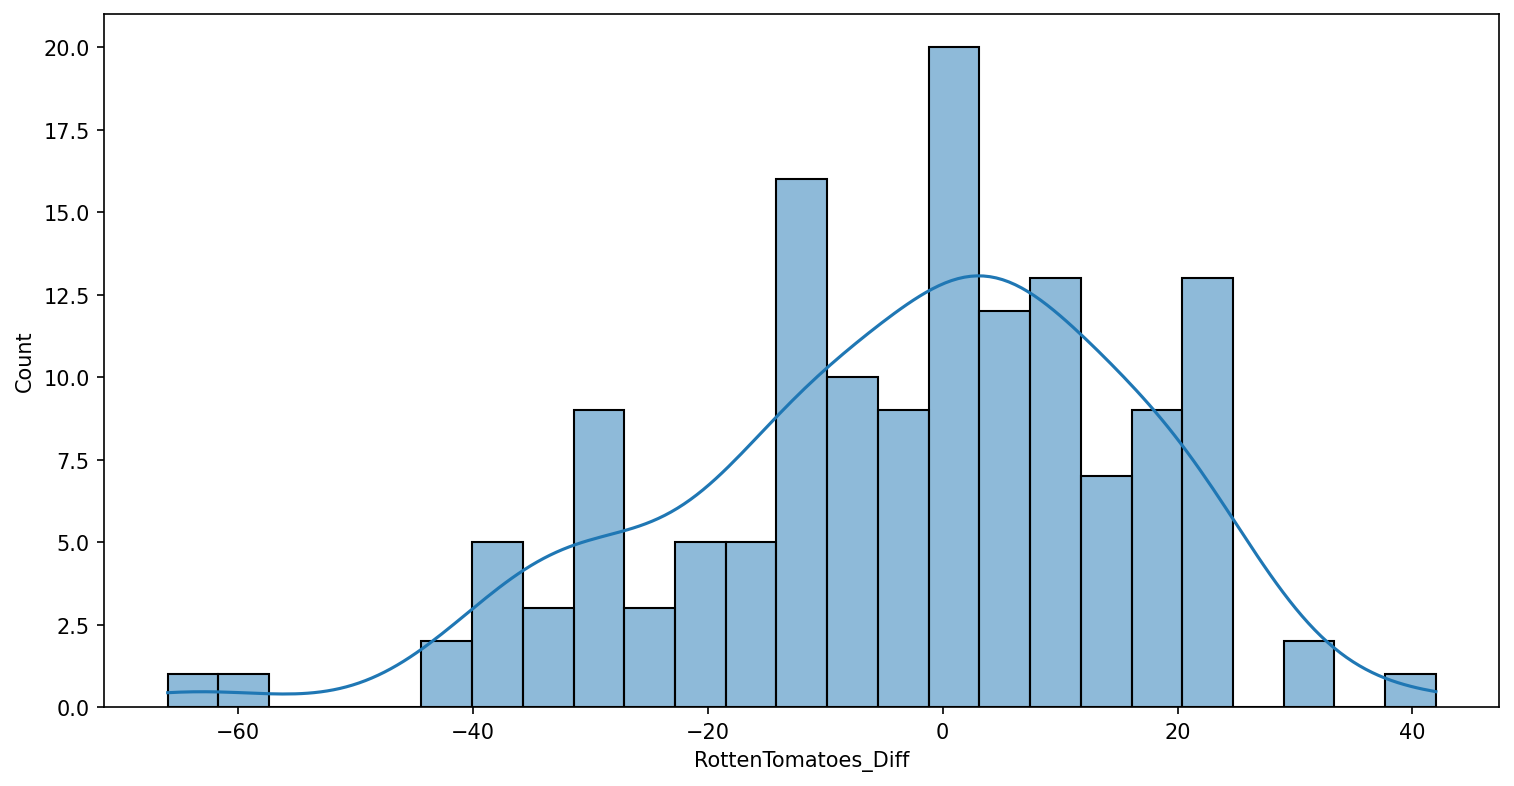

In [24]:

plt.figure(figsize=(12,6) , dpi = 150)
sns.histplot(data = all_sites , x = "RottenTomatoes_Diff" , kde = True , bins = 25)


Plotting absolute value of the difference between Critics and Users on Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes_Diff', ylabel='Count'>

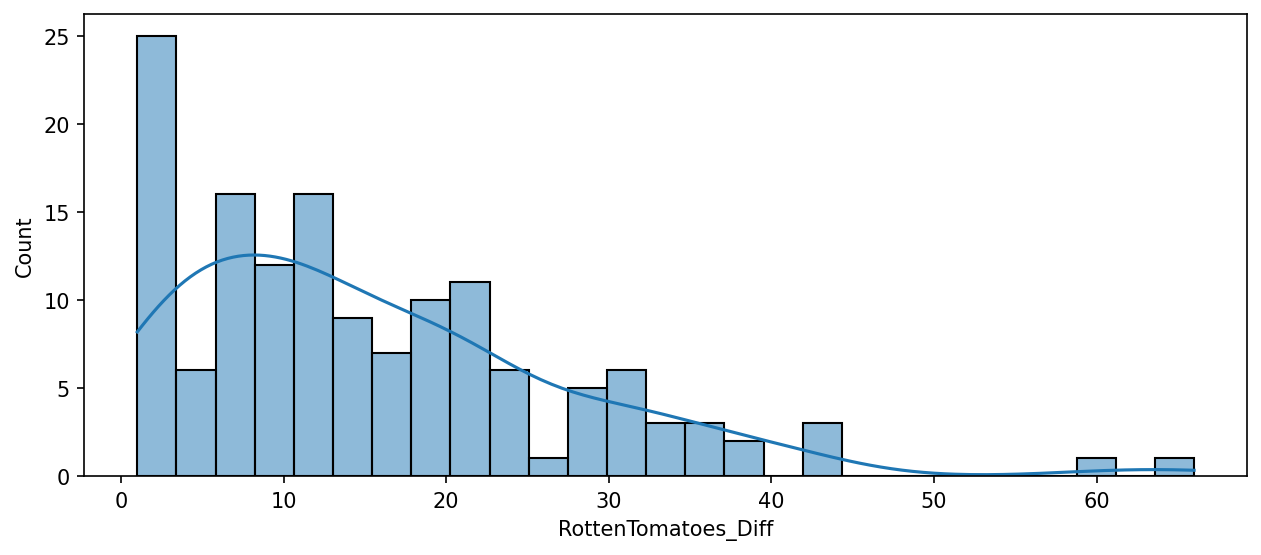

In [25]:

plt.figure(figsize = (10,4) , dpi = 150)
def make_positive(num):
    if num < 0 :
        return num*-1 
    if num > 0 :
        return num*1
sns.histplot(data = all_sites["RottenTomatoes_Diff"].apply(lambda num : make_positive(num)) , kde=True , bins = 27)

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**Top 5 movies users rated higher than critics on average:**

In [26]:

all_sites.sort_values(by = "RottenTomatoes_Diff").head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


**Top 5 movies critics scores higher than users on average.**

In [27]:

all_sites[["FILM" , "RottenTomatoes_Diff"]].sort_values(by = "RottenTomatoes_Diff" , ascending = False).head(5)

,FILM,RottenTomatoes_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

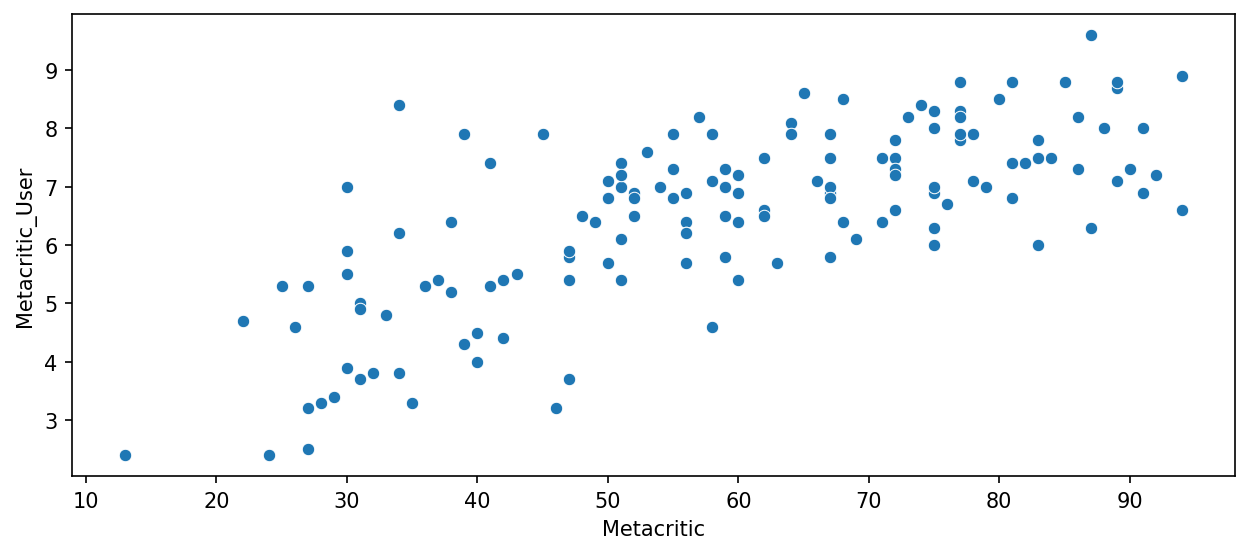

In [28]:

plt.figure(figsize=(10,4) ,dpi = 150)
all_sites
sns.scatterplot(data = all_sites , x = "Metacritic" , y = "Metacritic_User")

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Plotting a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

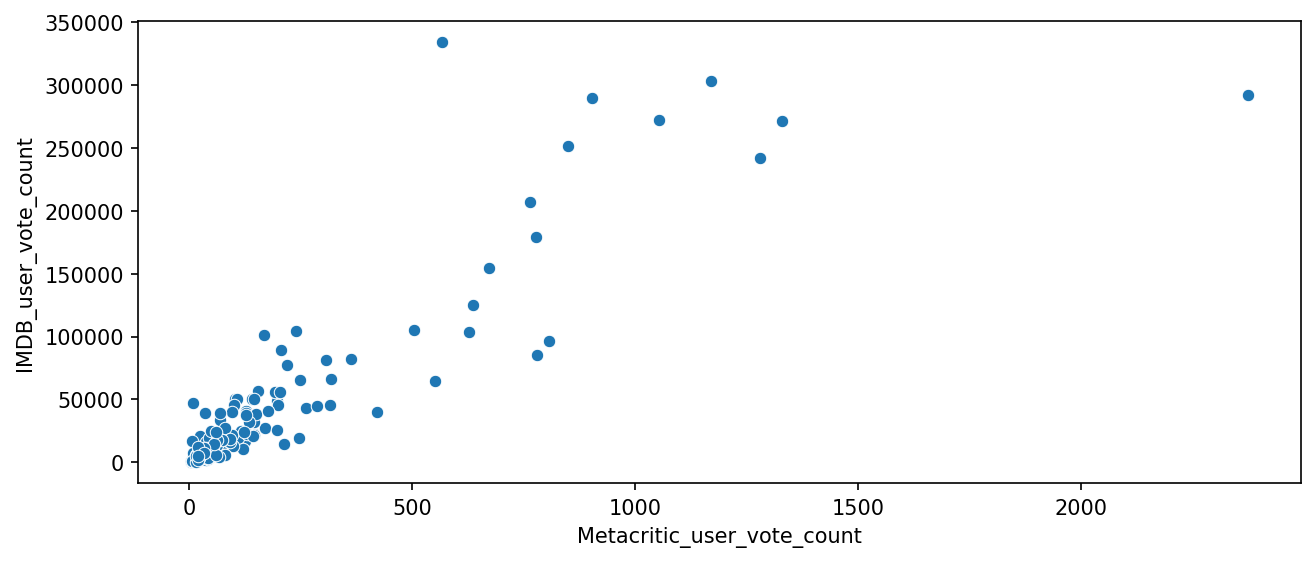

In [29]:

all_sites
plt.figure(figsize=(10,4) , dpi = 150)
sns.scatterplot(data = all_sites , x = "Metacritic_user_vote_count" , y = "IMDB_user_vote_count")

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**The movie that has the highest IMDB user vote count?**

In [30]:

all_sites
all_sites.sort_values(by = "IMDB_user_vote_count" , ascending = False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**The movie that has the highest Metacritic User Vote count?**

In [31]:

all_sites.sort_values(by = "Metacritic_user_vote_count" , ascending = False ).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [32]:

merged_movies = pd.merge(fandango , all_sites , on = "FILM" , how = "inner")
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   STARS_DIFF                  145 non-null    float64
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenTomatoes_Diff         145 non-null    int64  
dtypes: float64(5), int64(7), object(1)


In [43]:
merged_movies.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8



### Normalizing columns to Fandango STARS and RATINGS 0-5  
Since RT , Metacritic and IMDB don't use a score between 0-5 stars like Fandango does .

In [33]:

merged_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
VOTES,145.0,3817.696552,6368.668671,35.0,218.0,1430.0,4279.0,34846.0
STARS_DIFF,145.0,0.244828,0.152721,0.0,0.1,0.2,0.4,0.5
RottenTomatoes,145.0,60.634483,30.161098,5.0,31.0,63.0,89.0,100.0
RottenTomatoes_User,145.0,63.696552,19.974749,20.0,50.0,66.0,81.0,94.0
Metacritic,145.0,58.696552,19.538183,13.0,43.0,59.0,75.0,94.0
Metacritic_User,145.0,6.508966,1.510883,2.4,5.7,6.8,7.5,9.6
IMDB,145.0,6.729655,0.957944,4.0,6.3,6.9,7.4,8.6
Metacritic_user_vote_count,145.0,184.489655,317.361740,4.0,33.0,72.0,167.0,2375.0


In [34]:
merged_movies["Norm_RT"] = np.round(merged_movies["RottenTomatoes"] / 20  ,1)
merged_movies["Norm_RTU"] = np.round(merged_movies["RottenTomatoes_User"]/20 ,1)
merged_movies["Norm_Meta"] = np.round(merged_movies["Metacritic"] /20 ,1)
merged_movies["Norm_Meta_U"] = np.round(merged_movies["Metacritic_User"]/2 ,1)
merged_movies["Norm_IMDB"] = np.round(merged_movies["IMDB"]/2 ,1)

In [53]:
merged_movies.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff,Norm_RT,Norm_RTU,Norm_Meta,Norm_MetaU,Norm_IMDB,Norm_Meta_U
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1,1.6
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6,3.5
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7,3.3
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7,3.4
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3,4.4


**Creating a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [35]:
merged_movies.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'STARS_DIFF', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'RottenTomatoes_Diff', 'Norm_RT', 'Norm_RTU', 'Norm_Meta',
       'Norm_Meta_U', 'Norm_IMDB'],
      dtype='object')

In [37]:
norm_scores = merged_movies[['STARS' , "RATING" ,'Norm_RT', "Norm_RTU" , "Norm_Meta" , "Norm_Meta_U" , "Norm_IMDB"]]
norm_scores

,STARS,RATING,Norm_RT,Norm_RTU,Norm_Meta,Norm_Meta_U,Norm_IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites

**Creating a plot comparing the distributions of normalized ratings across all sites.**



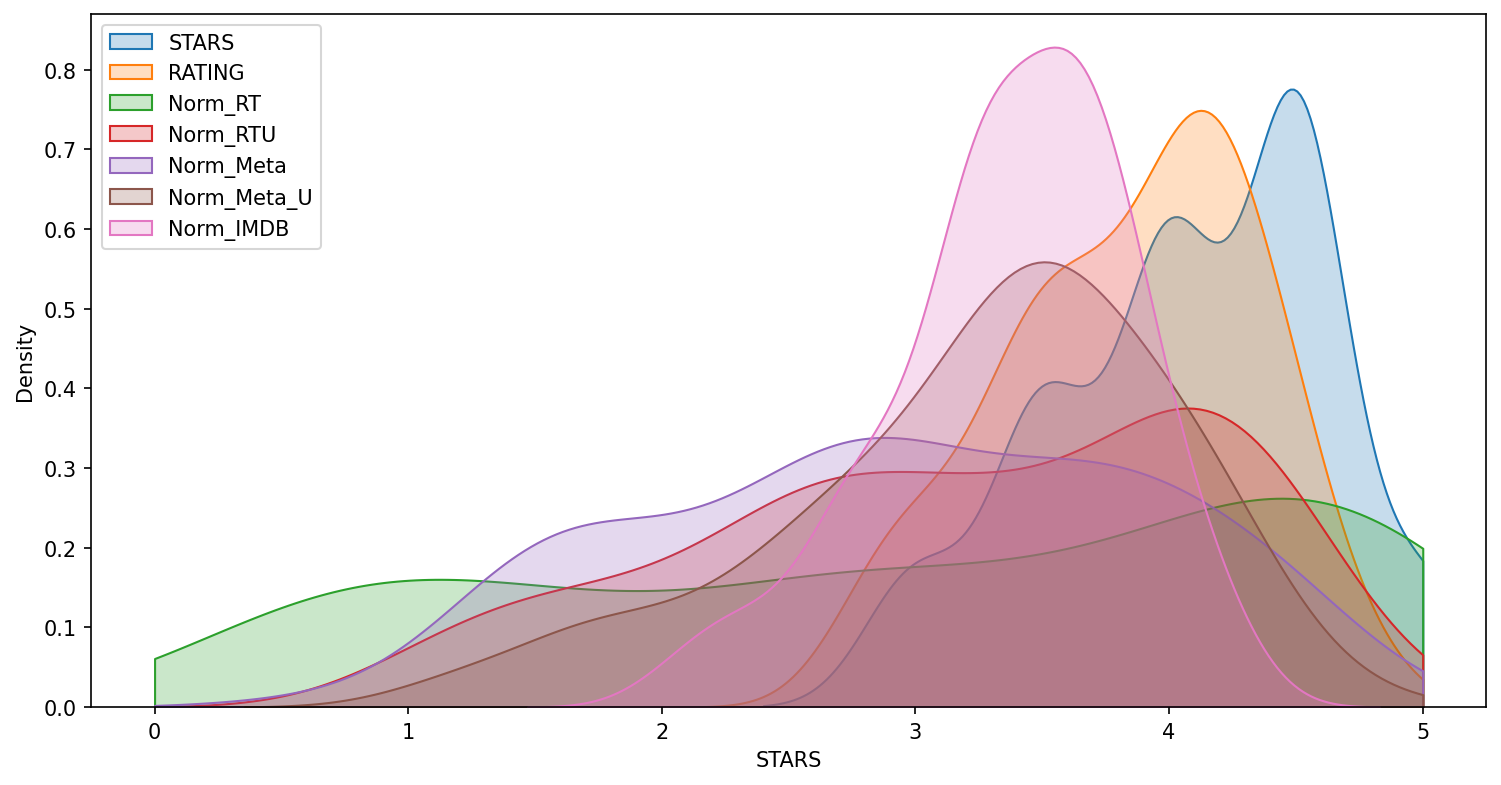

In [38]:

plt.figure(figsize=(12,6) , dpi = 150)
norm_scores.columns
# plotting the kde using for loop 
for column in norm_scores.columns :
    sns.kdeplot(data = norm_scores , x = column , label = column , fill = True , clip = [0,5]  )
# Showing the legend
plt.legend(loc = "upper left" )


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 


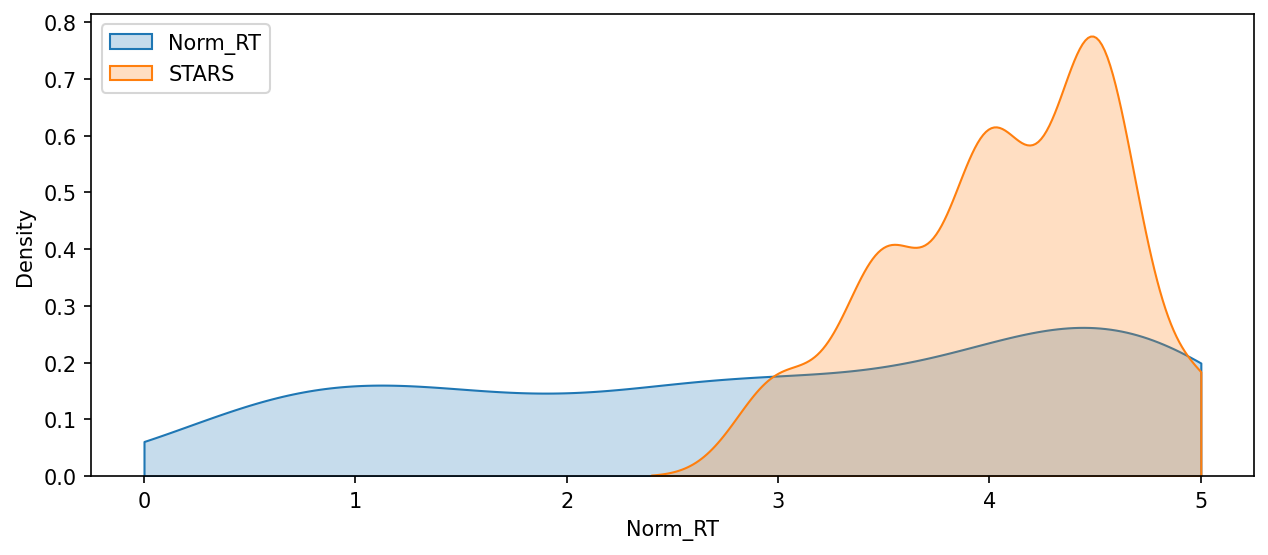

In [39]:

plt.figure(figsize=(10,4) , dpi = 150)
norm_scores.columns
sns.kdeplot(data = norm_scores , x = "Norm_RT" , fill = True , clip = [0,5] , label = "Norm_RT")
sns.kdeplot(data = norm_scores , x = "STARS" , fill = True , clip=[0,5] , label = "STARS")
# showing the legend 
plt.legend(loc = "upper left")



**Creating a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index**

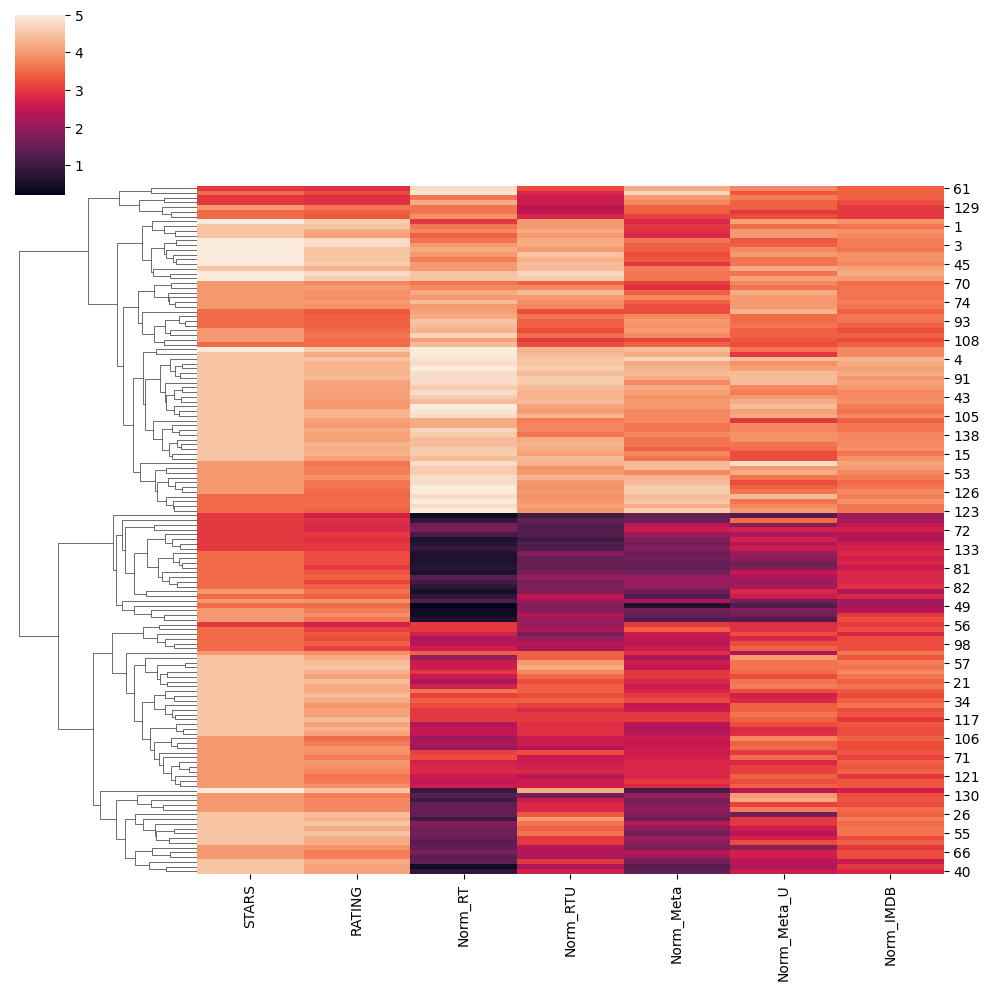

In [40]:

sns.clustermap(data = norm_scores , col_cluster= False )

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [41]:

norm_scores["FILM"] = merged_movies["FILM"]
norm_scores

C:\Users\gaurav\AppData\Local\Temp\ipykernel_2448\1635640617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores["FILM"] = merged_movies["FILM"]


,STARS,RATING,Norm_RT,Norm_RTU,Norm_Meta,Norm_Meta_U,Norm_IMDB,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7,Tangerine (2015)


In [142]:
norm_scores.sort_values(by = "Norm_RT" , ascending=True).head(10)

,STARS,RATING,Norm_RT,Norm_RTU,Norm_Meta,Norm_Meta_U,Norm_IMDB,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

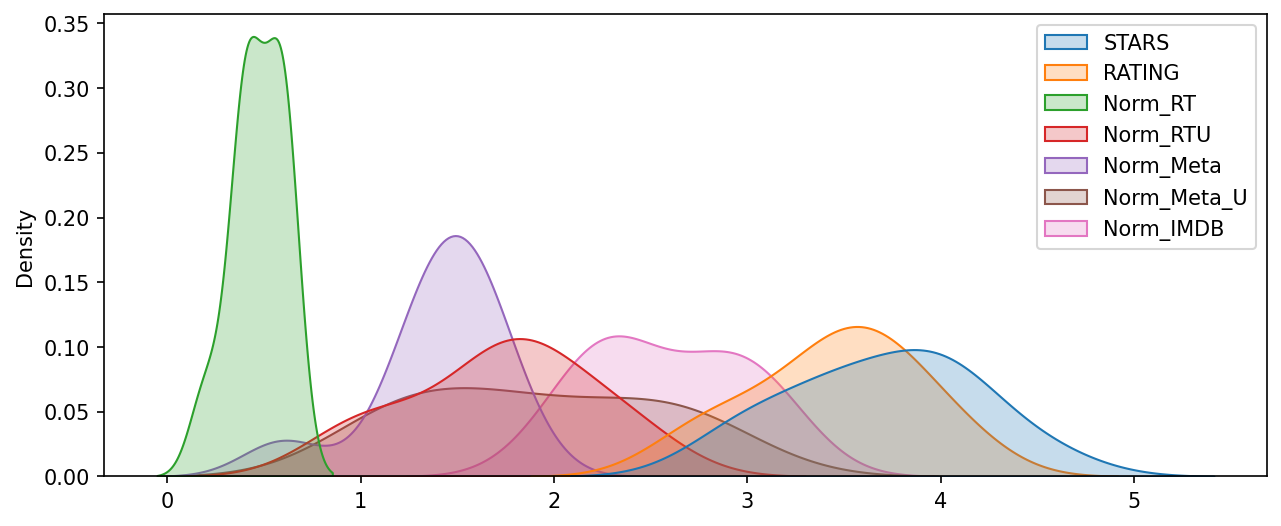

In [42]:

plt.figure(figsize=(10,4) , dpi = 150)
sns.kdeplot(data = norm_scores.sort_values(by = "Norm_RT" , ascending=True).head(10) , fill = True)